In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv("breast-cancer.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208  

# Exploratory Data Analysis (EDA) & Necessary Data Cleaning

#### The following visualization shows that there is multicollinearity between some pairs of features

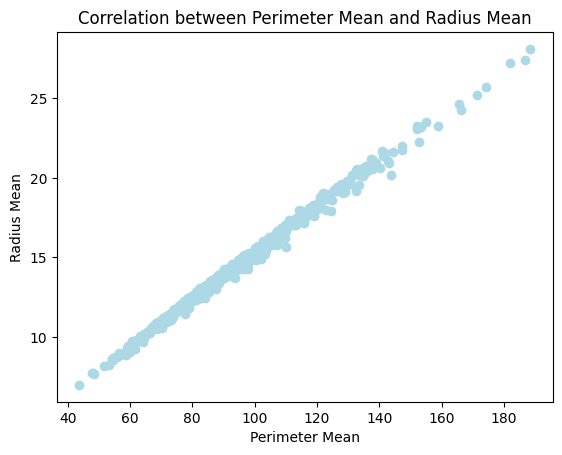

In [ ]:
plt.scatter(x=df["perimeter_mean"], y=df["radius_mean"], color='lightblue')
plt.xlabel("Perimeter Mean")
plt.ylabel("Radius Mean")
plt.title("Correlation between Perimeter Mean and Radius Mean")
plt.savefig("perimeter_radius_corr.png", format='png', dpi=300)
plt.show()

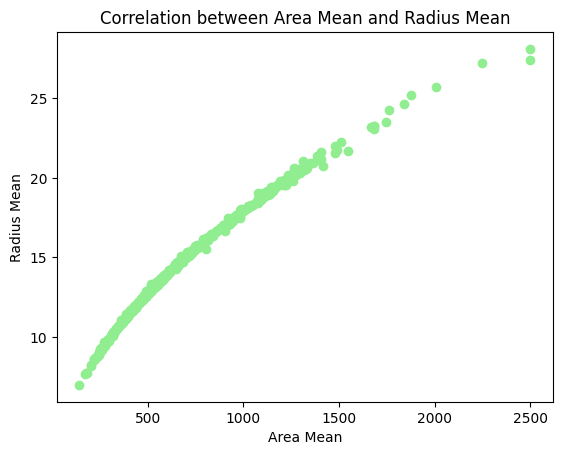

In [ ]:
plt.scatter(x=df["area_mean"], y=df["radius_mean"], color='lightgreen')
plt.xlabel("Area Mean")
plt.ylabel("Radius Mean")
plt.title("Correlation between Area Mean and Radius Mean")
plt.savefig("area_radius_corr.png", format='png', dpi=300)
plt.show()

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

##### Radius_Mean

In [ ]:
lowest_rad, highest_rad = df['radius_mean'].min(), df['radius_mean'].max()
lowest_rad, highest_rad

(6.981, 28.11)

In [ ]:
df[df['radius_mean']==lowest_rad]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
101  862722         B        6.981         13.43           43.79      143.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
101            0.117           0.07568             0.0                  0.0   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
101          0.193                 0.07818     0.2241       1.508   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
101         1.553    9.833        0.01019         0.01084           0.0   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
101                0.0      0.02659                0.0041          7.93   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
101          19.54            50.41       185.2            0.1584   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
101             0.1202              0.0                   0.0          0.2932   

     fractal_dimension_worst  
101                  0.09382

In [ ]:
df[df['radius_mean']==highest_rad]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
212  8810703         M        28.11         18.47           188.5     2499.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
212           0.1142            0.1516          0.3201               0.1595   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
212         0.1648                 0.05525      2.873       1.476   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
212         21.98    525.6        0.01345         0.02772       0.06389   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
212            0.01407      0.04783              0.004476         28.11   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
212          18.47            188.5      2499.0            0.1142   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
212             0.1516           0.3201                0.1595          0.1648   

     fractal_dimension_worst  
212                  0.05525

##### Symmetry_Mean

In [ ]:
lowest_sym, highest_sym = df['symmetry_mean'].min(), df['symmetry_mean'].max()
lowest_sym, highest_sym

(0.106, 0.304)

In [ ]:
df[df["symmetry_mean"]==lowest_sym]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
561  925311         B         11.2         29.37           70.67      386.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
561          0.07449           0.03558             0.0                  0.0   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
561          0.106                 0.05502     0.3141       3.896   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
561         2.041    22.81       0.007594        0.008878           0.0   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
561                0.0      0.01989              0.001773         11.92   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
561           38.3            75.19       439.6           0.09267   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
561            0.05494              0.0                   0.0          0.1566   

     fractal_dimension_worst  
561                  0.05905

In [ ]:
df[df['symmetry_mean']==highest_sym]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
25  852631         M        17.14          16.4           116.0      912.7   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
25           0.1186            0.2276          0.2229               0.1401   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
25          0.304                 0.07413      1.046       0.976   

    perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
25         7.276    111.4       0.008029         0.03799       0.03732   

    concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
25            0.02397      0.02308              0.007444         22.25   

    texture_worst  perimeter_worst  area_worst  smoothness_worst  \
25           21.4            152.4      1461.0            0.1545   

    compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
25             0.3949           0.3853                 0.255          0.4066   

    fractal_dimension_worst  
25                   0.1059

##### Compactness_Mean

In [ ]:
lowest_compact, highest_compact = df['compactness_mean'].min(), df['compactness_mean'].max()
lowest_compact, highest_compact

(0.01938, 0.3454)

In [ ]:
df[df["compactness_mean"]==lowest_compact]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
178  873357         B        13.01         22.22           82.01      526.4   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
178          0.06251           0.01938        0.001595             0.001852   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
178         0.1395                 0.05234     0.1731       1.142   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
178         1.101    14.34       0.003418        0.002252      0.001595   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
178           0.001852      0.01613              0.000968          14.0   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
178          29.02            88.18       608.8           0.08125   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
178            0.03432         0.007977              0.009259          0.2295   

     fractal_dimension_worst  
178                  0.05843

In [ ]:
df[df["compactness_mean"]==highest_compact]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
78  8610862         M        20.18         23.97           143.7     1245.0   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
78           0.1286            0.3454          0.3754               0.1604   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
78         0.2906                 0.08142     0.9317       1.885   

    perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
78         8.649    116.4        0.01038         0.06835        0.1091   

    concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
78            0.02593      0.07895              0.005987         23.37   

    texture_worst  perimeter_worst  area_worst  smoothness_worst  \
78          31.72            170.3      1623.0            0.1639   

    compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
78             0.6164           0.7681                0.2508           0.544   

    fractal_dimension_worst  
78                  0.09964

##### Perimeter_Mean

In [ ]:
lowest_perim, highest_perim = df['perimeter_mean'].min(), df['perimeter_mean'].max()
lowest_perim, highest_perim

(43.79, 188.5)

In [ ]:
df[df['perimeter_mean']==lowest_perim]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
101  862722         B        6.981         13.43           43.79      143.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
101            0.117           0.07568             0.0                  0.0   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
101          0.193                 0.07818     0.2241       1.508   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
101         1.553    9.833        0.01019         0.01084           0.0   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
101                0.0      0.02659                0.0041          7.93   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
101          19.54            50.41       185.2            0.1584   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
101             0.1202              0.0                   0.0          0.2932   

     fractal_dimension_worst  
101                  0.09382

In [ ]:
df[df['perimeter_mean']==highest_perim]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
212  8810703         M        28.11         18.47           188.5     2499.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
212           0.1142            0.1516          0.3201               0.1595   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
212         0.1648                 0.05525      2.873       1.476   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
212         21.98    525.6        0.01345         0.02772       0.06389   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
212            0.01407      0.04783              0.004476         28.11   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
212          18.47            188.5      2499.0            0.1142   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
212             0.1516           0.3201                0.1595          0.1648   

     fractal_dimension_worst  
212                  0.05525

So far, perimeter_mean and radius_mean columns align with our expectations.

In [ ]:
df.shape

(569, 32)

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

In [ ]:
mapD = {"B": 0, "M": 1} # positive class corresponds Malignant
df['diagnosis'] = df['diagnosis'].map(mapD)
df.diagnosis.unique()

array([1, 0])

In [ ]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [ ]:
df.dtypes # confirming diagnosis is now int

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

### NB: radius_mean: <br>
Mean Calculation: The "mean" part of the column name suggests that the value in this column is the average of multiple radius measurements taken for a particular tumor.

In [ ]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
df.diagnosis.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [ ]:
df.diagnosis.value_counts(normalize=True).values

array([0.62741652, 0.37258348])

In [ ]:
percent_M = round(df.diagnosis.value_counts(normalize=True).values[1]*100, 2)
percent_B = round(df.diagnosis.value_counts(normalize=True).values[0]*100, 2)
percent_M

37.26

In [ ]:
print(f"We have found that {percent_M}% of our dataset is Malignant, and {percent_B}% of our dataset is Benign.")

We have found that 37.26% of our dataset is Malignant, and 62.74% of our dataset is Benign.


In [ ]:
df.describe()

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean  symmetry_mean  fractal_dimension_mean   radius_se  \
count           569.000000     569.000000              569.000000  569.000000   
mean              0.048919       0.181162                0.062798    0.405172   
std               0.038803       0.027414                0.007060    0.277313   
min               0.000000       0.106000                0.049960    0.111500   
25%               0.020310       0.161900                0.057700    0.232400   
50%               0.033500       0.179200                0.061540    0.324200   
75%               0.074000       0.195700                0.066120    0.478900   
max               0.201200       0.304000                0.097440    2.873000   

       texture_se  perimeter_se     area_se  smoothness_se  compactness_se  \
count  569.000000    569.000000  569.000000     569.000000      569.000000   
mean     1.216853      2.866059   40.337079       0.007041        0.025478   
std      0.551648      2.021855   45.491006       0.003003        0.017908   
min      0.360200      0.757000    6.802000       0.001713        0.002252   
25%      0.833900      1.606000   17.850000       0.005169        0.013080   
50%      1.108000      2.287000   24.530000       0.006380        0.020450   
75%      1.474000      3.357000   45.190000       0.008146        0.032450   
max      4.885000     21.980000  542.200000       0.031130        0.135400   

       concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
count    569.000000         569.000000   569.000000            569.000000   
mean       0.031894           0.011796     0.020542              0.003795   
std        0.030186           0.006170     0.008266              0.002646   
min        0.000000           0.000000     0.007882              0.000895   
25%        0.015090           0.007638     0.015160              0.002248   
50%        0.025890           0.010930     0.018730              0.003187   
75%        0.042050           0.014710     0.023480              0.004558   
max        0.396000           0.052790     0.078950              0.029840   

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  

In [ ]:
filter1 = df[["radius_mean", 'radius_worst', 'radius_se']] # se: standard error
filter1

radius_mean  radius_worst  radius_se
0          17.99        25.380     1.0950
1          20.57        24.990     0.5435
2          19.69        23.570     0.7456
3          11.42        14.910     0.4956
4          20.29        22.540     0.7572
..           ...           ...        ...
564        21.56        25.450     1.1760
565        20.13        23.690     0.7655
566        16.60        18.980     0.4564
567        20.60        25.740     0.7260
568         7.76         9.456     0.3857

[569 rows x 3 columns]

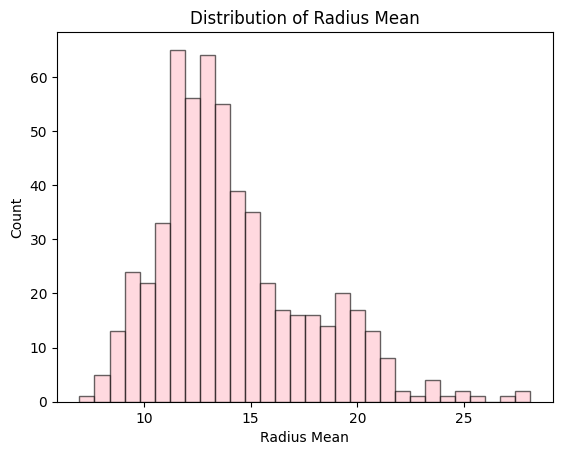

In [ ]:
plt.hist(x = df['radius_mean'], bins=30, color="pink", edgecolor='black', alpha = 0.6)
plt.xlabel("Radius Mean")
plt.ylabel("Count")
plt.title("Distribution of Radius Mean")
plt.savefig("histogram_radiusmean.png", format='png', dpi=300)
plt.show()

In [ ]:
df_M = df[df["diagnosis"]==1] # avg of perimeter mean from the Malignant group
df_B = df[df["diagnosis"]==0] # avg of perimeter mean from the Benign group
avg_perim_M = df_M["perimeter_mean"].mean()
avg_perim_B = df_B["perimeter_mean"].mean()
avg_perim_M, avg_perim_B

(115.36537735849056, 78.075406162465)

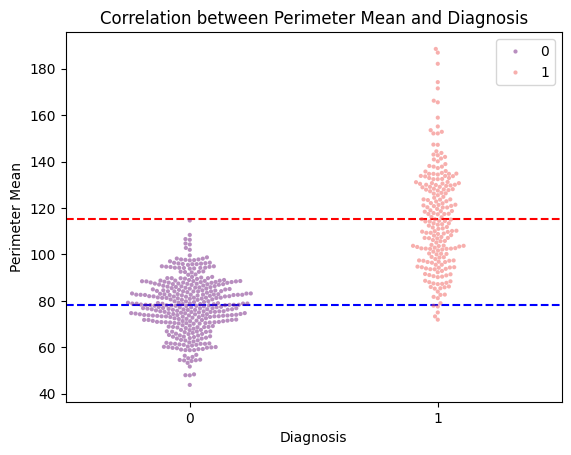

In [ ]:
sns.swarmplot(x=df["diagnosis"], y=df["perimeter_mean"], hue=df["diagnosis"], palette='magma', alpha=0.5, size=3)
plt.axhline(y=avg_perim_M, color="red", linestyle="--")
plt.axhline(y=avg_perim_B, color="blue", linestyle="--")
plt.xlabel("Diagnosis")
plt.ylabel("Perimeter Mean")
plt.title("Correlation between Perimeter Mean and Diagnosis")
plt.legend()
plt.savefig("Swarmplot perim_diagnosis.png", format='png', dpi=300)
plt.show()

# Binary Classification (Malignant or Benign)

### KNN Model with 3 Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
X = df.drop(columns=["diagnosis", "id"])
y = df["diagnosis"]

In [ ]:
df.shape

(569, 32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(455, 30)

In [ ]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68            0.14130         0.31300              0.04375         0.2111   
181           0.28320         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2743   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
68                  0.08046     0.3274      1.1940        1.8850    17.67   
181                 0.07398     0.6298      0.7629        4.4140    81.46   
63                  0.06963     0.4098      2.2650        2.6080    23.52   
248                 0.06329     0.2497      1.4930        1.4970    16.64   
60                  0.06960     0.5158      1.4410        3.3120    34.62   
..                      ...        ...         ...           ...      ...   
71                  0.08980     0.5262      0.8522        3.1680    25.44   
106                 0.06520     0.3060      1.6570        2.1550    20.62   
270                 0.05376     0.1302      0.7198        0.8439    10.77   
435                 0.06544     0.2208      0.9533        1.6020    18.85   
102                 0.05677     0.1924      1.5710        1.1830    14.68   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
68        0.009549        0.086060      0.303800           0.033220   
181       0.004253        0.047590      0.038720           0.015670   
63        0.008738        0.039380      0.043120           0.015600   
248       0.007189        0.010350      0.010810           0.006245   
60        0.007514        0.010990      0.007665           0.008193   
..             ...             ...           ...                ...   
71        0.017210        0.093680      0.056710           0.017660   
106       0.008540        0.023100      0.029450           0.013980   
270       0.003492        0.003710      0.004826           0.003608   
435       0.005314        0.017910      0.021850           0.009567   
102       0.005080        0.006098      0.010690           0.006797   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
68       0.04197              0.009559        10.310          22.65   
181      0.01798              0.005295        26.680          33.48   
63       0.04192              0.005822        10.010          19.23   
248      0.02158              0.002619        12.250          35.19   
60       0

In [ ]:
y_train.shape

(455,)

In [ ]:
# scaler = StandardScaler() # apply standard scaler
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
y_pred # prediction - cancer or not

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
y_probs = knn.predict_proba(X_test)[:,1] # probability of the positive class (M)
y_probs = np.round(y_probs,2)
pd.DataFrame(y_probs) # likelihood that person has cancer

0
0    0.67
1    1.00
2    1.00
3    0.00
4    0.00
..    ...
109  0.00
110  1.00
111  0.00
112  0.33
113  1.00

[114 rows x 1 columns]

Evaluation Metrics:

In [ ]:
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy Percentage: {round((acc_knn*100),2)}%")
cm_knn = confusion_matrix(y_test, y_pred)
# TN FP
# FN TP
print(f"\nConfusion Matrix:\n{cm_knn}\n")
prec_knn, rec_knn, f1_knn = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f"Precision Percentage: {round(prec_knn*100,2)}")
print(f"Recall Percentage: {round(rec_knn*100,2)}")
print(f"F1 Score: {round(f1_knn*100,2)}")

auc_knn = roc_auc_score(y_test, y_probs)
print(f"\nAUC Percentage: {round(auc_knn*100,2)}")

Accuracy Percentage: 92.98%

Confusion Matrix:
[[68  3]
 [ 5 38]]

Precision Percentage: 92.68
Recall Percentage: 88.37
F1 Score: 90.48

AUC Percentage: 97.95


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X = df.iloc[:, 2:12] # selected features
y = df["diagnosis"]
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  
0                 0.07871  
1                 0.05667  
2                 0.05999  
3                 0.09744  
4                 0.05883

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(398, 10)

In [ ]:
scaler = StandardScaler() # apply standard scaler, as logistic model did not converge without standar scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logr.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
y_probs = logr.predict_proba(X_test)[:,1]
y_probs = np.round(y_probs,2)
pd.DataFrame(y_probs)

0
0    0.09
1    0.99
2    0.98
3    0.03
4    0.00
..    ...
166  0.03
167  0.46
168  0.00
169  0.96
170  0.02

[171 rows x 1 columns]

In [ ]:
acc_logr = accuracy_score(y_test, y_pred)
print(f"Accuracy Percentage: {round((acc_logr*100),2)}%")
cm_logr = confusion_matrix(y_test, y_pred)
# TN FP
# FN TP
print(f"\nConfusion Matrix:\n{cm_logr}\n")
prec_logr, rec_logr, f1_logr = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f"Precision Percentage: {round(prec_logr*100,2)}")
print(f"Recall Percentage: {round(rec_logr*100,2)}")
print(f"F1 Score: {round(f1_logr*100,2)}")

auc_logr = roc_auc_score(y_test, y_probs)
print(f"\nAUC Percentage: {round(auc_logr*100,2)}")

Accuracy Percentage: 93.57%

Confusion Matrix:
[[103   5]
 [  6  57]]

Precision Percentage: 91.94
Recall Percentage: 90.48
F1 Score: 91.2

AUC Percentage: 99.21


### RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

##### Performing Feature Selection: Keep only the Attribute_Worst cols

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
X = df.iloc[:, 2:12] # selected features
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  
0                   0.07871  
1                   0.05667  
2                   0.05999  
3                   0.09744  
4                   0.05883  
..                      ...  
564                 0.05623  
565                 0.05533  
566                 0.05648  
567                 0.07016  
568                 0.05884  

[569 rows x 10 columns]

In [ ]:
y = df["diagnosis"]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train.shape

(455, 10)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
y_test.values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
y_probs = rf.predict_proba(X_test)[:,1]
y_probs = np.round(y_probs,2)
pd.DataFrame(y_probs)

0
0    0.00
1    0.47
2    0.02
3    0.10
4    0.87
..    ...
109  0.02
110  0.00
111  0.01
112  0.70
113  0.31

[114 rows x 1 columns]

In [ ]:
acc_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy Percentage: {round((acc_rf*100),2)}%")
cm_rf = confusion_matrix(y_test, y_pred)
# TN FP
# FN TP
print(f"\nConfusion Matrix:\n{cm_rf}\n")
prec_rf, rec_rf, f1_rf = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f"Precision Percentage: {round(prec_rf*100,2)}")
print(f"Recall Percentage: {round(rec_rf*100,2)}")
print(f"F1 Score: {round(f1_rf*100,2)}")

auc_rf = roc_auc_score(y_test, y_probs)
print(f"\nAUC Percentage: {round(auc_rf*100,2)}") # want this to be as close to 1 as possible

Accuracy Percentage: 94.74%

Confusion Matrix:
[[72  3]
 [ 3 36]]

Precision Percentage: 92.31
Recall Percentage: 92.31
F1 Score: 92.31

AUC Percentage: 97.11


### Neural Networks - Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X = df.iloc[:, 2:12] # selected features
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(455, 10)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, learning_rate_init=0.1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.1,
              max_iter=1000, random_state=42)

In [ ]:
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [ ]:
y_probs = mlp.predict_proba(X_test)[:, 1]
y_probs = np.round(y_probs, 2)
pd.DataFrame(y_probs)

0
0    0.98
1    0.95
2    0.39
3    1.00
4    1.00
..    ...
109  0.00
110  1.00
111  0.00
112  0.00
113  0.00

[114 rows x 1 columns]

In [ ]:
acc_mlp = accuracy_score(y_test, y_pred)
print(f"Accuracy Percentage: {round((acc_mlp*100),2)}%")
cm_mlp = confusion_matrix(y_test, y_pred)
# TN FP
# FN TP
print(f"\nConfusion Matrix:\n{cm_mlp}\n")
prec_mlp, rec_mlp, f1_mlp = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f"Precision Percentage: {round(prec_mlp*100,2)}")
print(f"Recall Percentage: {round(rec_mlp*100,2)}")
print(f"F1 Score: {round(f1_mlp*100,2)}")

auc_mlp = roc_auc_score(y_test, y_probs)
print(f"\nAUC Percentage: {round(auc_mlp*100,2)}") # want this to be as close to 1 as possible

Accuracy Percentage: 92.11%

Confusion Matrix:
[[69  3]
 [ 6 36]]

Precision Percentage: 92.31
Recall Percentage: 85.71
F1 Score: 88.89

AUC Percentage: 93.87


#### Comparing and Evaluating Performance of the Various Models Used:

In [ ]:
accs_dictionary = {"Knn": acc_knn, 'Logistic': acc_logr, "RandomForest":acc_rf, 'MLP': acc_mlp}
accs_dictionary

{'Knn': 0.9298245614035088,
 'Logistic': 0.935672514619883,
 'RandomForest': 0.9473684210526315,
 'MLP': 0.9210526315789473}

In [ ]:
evaluation_df = pd.DataFrame({"Model": ["KNN", "Logistic Regression", "Random Forest", "Multi-Layer Perceptron (Neural Network)"],
                             "Model Details": ["3 Neighbors, All Features", "Selected Features", "100 Estimators, Selected Features", "1000 Max Iterations, 0.1 Learning Rate, Selected Features"],
                             "Accuracy Score": [acc_knn, acc_logr, acc_rf, acc_mlp],
                             "Precision Score": [prec_knn, prec_logr, prec_rf, prec_mlp],
                             "Recall Score": [rec_knn, rec_logr, rec_rf, rec_mlp],
                             "F1 Score": [f1_knn, f1_logr, f1_rf, f1_mlp],
                             "AUC Score": [auc_knn, auc_logr, auc_rf, auc_mlp]})
evaluation_df

Model  \
0                                      KNN   
1                      Logistic Regression   
2                            Random Forest   
3  Multi-Layer Perceptron (Neural Network)   

                                       Model Details  Accuracy Score  \
0                          3 Neighbors, All Features        0.929825   
1                                  Selected Features        0.935673   
2                  100 Estimators, Selected Features        0.947368   
3  1000 Max Iterations, 0.1 Learning Rate, Select...        0.921053   

   Precision Score  Recall Score  F1 Score  AUC Score  
0         0.926829      0.883721  0.904762   0.979528  
1         0.919355      0.904762  0.912000   0.992137  
2         0.923077      0.923077  0.923077   0.971111  
3         0.923077      0.857143  0.888889   0.938657

### Decision: Random Forest is chosen as the overall best performing model.

In [ ]:
from sklearn.decomposition import PCA
X = df.drop(columns=["diagnosis", "id",'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['Principal_Component1', 'Principal_Component2'])
df_pca['diagnosis'] = df['diagnosis']
df_pca

Principal_Component1  Principal_Component2  diagnosis
0                7.892437              3.177473          1
1                2.624204             -3.307307          1
2                5.249249             -0.784665          1
3                6.628242             10.222789          1
4                3.136999             -2.283193          1
..                    ...                   ...        ...
564              4.915406             -3.434990          1
565              3.290318             -3.680924          1
566              1.005277             -2.348694          1
567             10.034646              1.960144          1
568             -5.246253             -0.790231          0

[569 rows x 3 columns]

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")

Explained variance by PC1: 0.53
Explained variance by PC2: 0.22


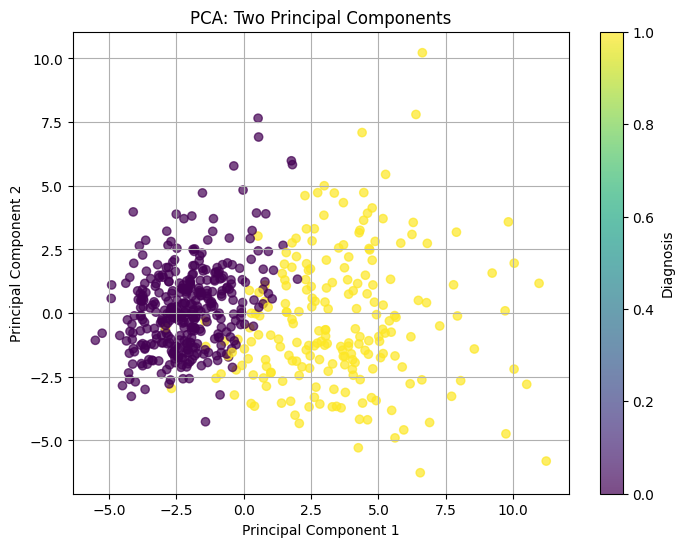

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['Principal_Component1'], df_pca['Principal_Component2'], c=df_pca['diagnosis'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Diagnosis')
plt.title('PCA: Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
df_pca.head(2)

Principal_Component1  Principal_Component2  diagnosis
0              7.892437              3.177473          1
1              2.624204             -3.307307          1

In [ ]:
X1 = df_pca["Principal_Component1"].values
X2 = df_pca["Principal_Component2"].values
y = df_pca["diagnosis"].values
print(f"PC1: {X1[:5]}\nPC2: {X2[:5]}\nDiagnosis: {y[:5]}")

PC1: [7.89243733 2.62420436 5.24924882 6.62824207 3.13699914]
PC2: [ 3.17747258 -3.30730717 -0.78466511 10.22278866 -2.28319322]
Diagnosis: [1 1 1 1 1]


In [ ]:
X = np.column_stack((X1, X2))
X[:5]

array([[ 7.89243733,  3.17747258],
       [ 2.62420436, -3.30730717],
       [ 5.24924882, -0.78466511],
       [ 6.62824207, 10.22278866],
       [ 3.13699914, -2.28319322]])

In [ ]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [ ]:
import plotly.graph_objects as go
x1_range = np.linspace(X1.min() - 1, X1.max() + 1, 100) # 100 steps in between the min and max
x2_range = np.linspace(X2.min() - 1, X2.max() + 1, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))

y_probs = lr.predict_proba(X_grid)[:, 1]
y_probs = y_probs.reshape(x1_grid.shape)

scatter_0 = go.Scatter3d(x=X1[y == 0], y=X2[y == 0], z=[0]*len(X1[y == 0]), mode='markers', marker=dict(color='red'), name='')
scatter_1 = go.Scatter3d(x=X1[y == 1], y=X2[y == 1], z=[1]*len(X1[y == 1]), mode='markers', marker=dict(color='blue'), name='')

surface = go.Surface(x=x1_grid, y=x2_grid, z=y_probs, colorscale='Viridis', opacity=0.6, name='Decision Boundary')

layout = go.Layout(
    title='Logistic Regression Decision Boundary',
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Probability'
    ),
    width=1000,
    height=800
)

fig = go.Figure(data=[scatter_0, scatter_1, surface], layout=layout)
fig.show()

In [ ]:
df_pca.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
small_df = df.iloc[:, 1:12]
small_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

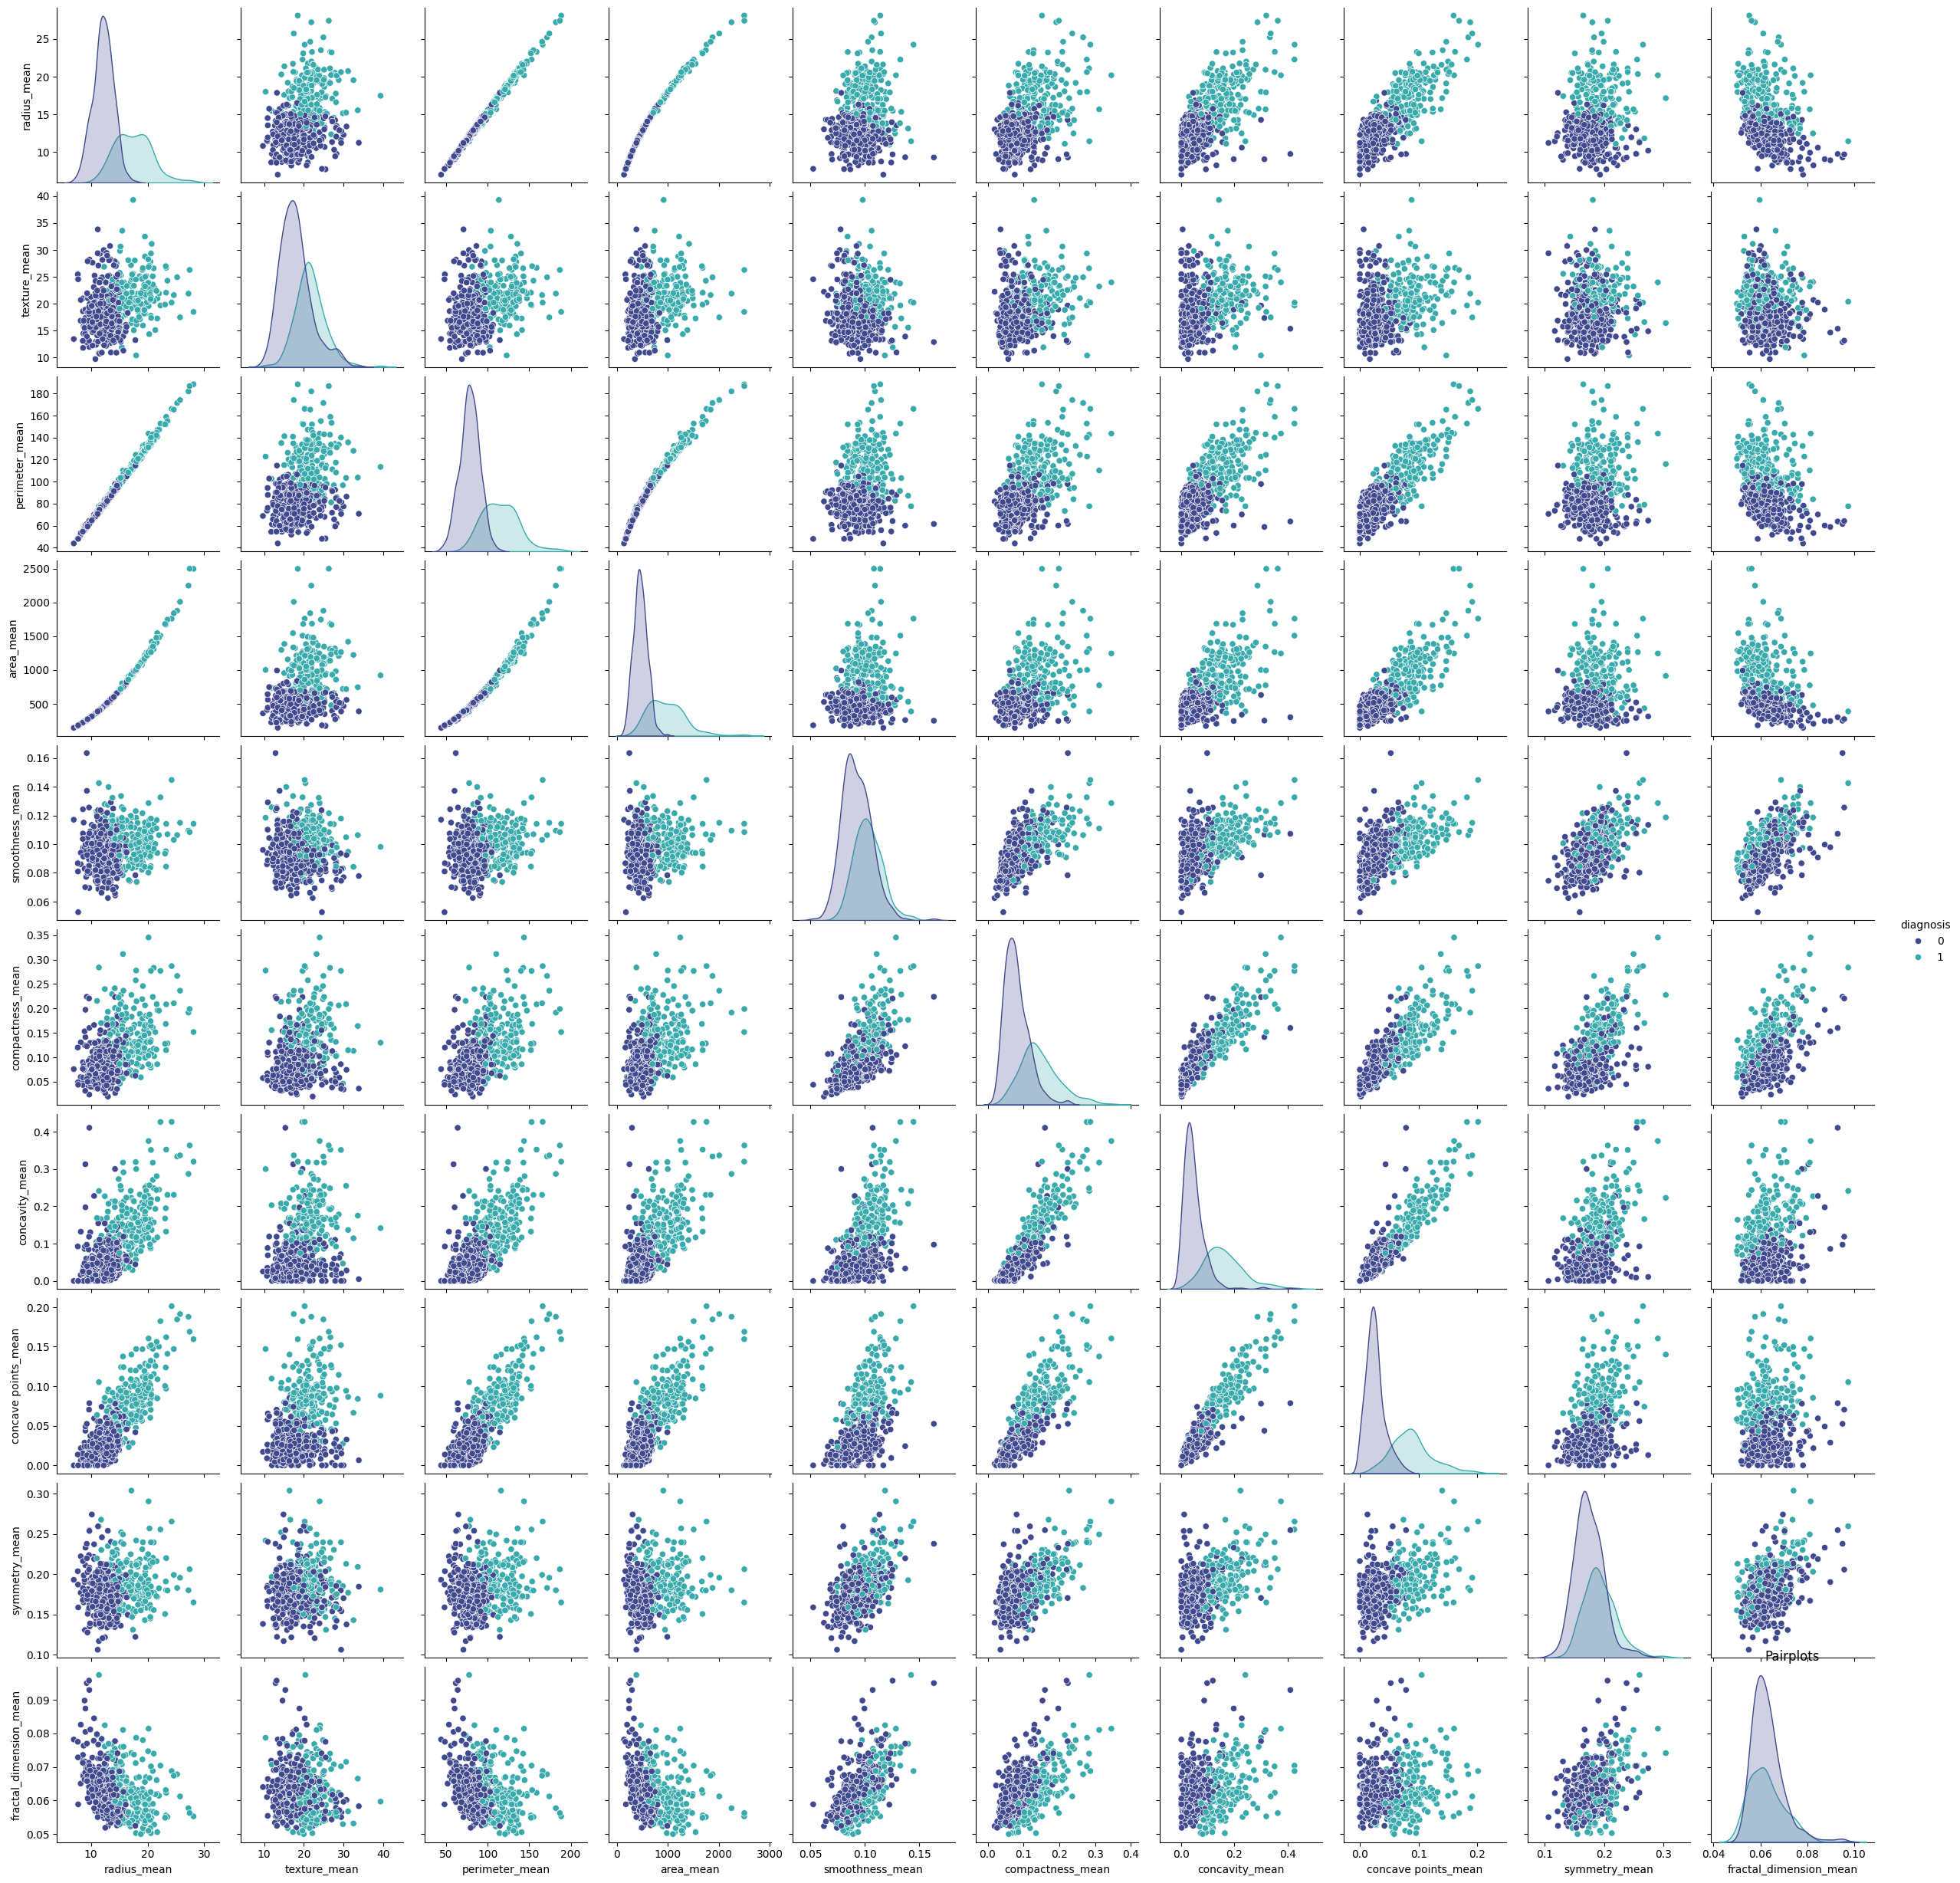

In [ ]:
sns.pairplot(data=small_df, hue="diagnosis", palette="mako")
plt.title("Pairplots")
plt.show()

All Strong Correlation Pairs:
- radius_mean and area_mean
- perimeter_mean and area_mean
- concavity_mean and concave_points_mean

In [ ]:
corr_matrix = small_df.corr()
corr_matrix

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000     0.730029      0.415185        0.742636   
radius_mean              0.730029     1.000000      0.323782        0.997855   
texture_mean             0.415185     0.323782      1.000000        0.329533   
perimeter_mean           0.742636     0.997855      0.329533        1.000000   
area_mean                0.708984     0.987357      0.321086        0.986507   
smoothness_mean          0.358560     0.170581     -0.023389        0.207278   
compactness_mean         0.596534     0.506124      0.236702        0.556936   
concavity_mean           0.696360     0.676764      0.302418        0.716136   
concave points_mean      0.776614     0.822529      0.293464        0.850977   
symmetry_mean            0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437       -0.261477   

                        area_mean  smoothness_mean  compactness_mean  \
diagnosis                0.708984         0.358560          0.596534   
radius_mean              0.987357         0.170581          0.506124   
texture_mean             0.321086        -0.023389          0.236702   
perimeter_mean           0.986507         0.207278          0.556936   
area_mean                1.000000         0.177028          0.498502   
smoothness_mean          0.177028         1.000000          0.659123   
compactness_mean         0.498502         0.659123          1.000000   
concavity_mean           0.685983         0.521984          0.883121   
concave points_mean      0.823269         0.553695          0.831135   
symmetry_mean            0.151293         0.557775          0.602641   
fractal_dimension_mean  -0.283110         0.584792          0.565369   

                        concavity_mean  concave points_mean  symmetry_mean  \
diagnosis                     0.696360             0.776614       0.330499   
radius_mean                   0.676764             0.822529       0.147741   
texture_mean                  0.302418             0.293464       0.071401   
perimeter_mean                0.716136             0.850977       0.183027   
area_mean                     0.685983             0.823269       0.151293   
smoothness_mean               0.521984             0.553695       0.557775   
compactness_mean              0.883121             0.831135       0.602641   
concavity_mean                1.000000             0.921391       0.500667   
concave points_mean           0.921391             1.000000       0.462497   
symmetry_mean                 0.500667             0.462497       1.000000   
fractal_dimension_mean        0.336783             0.166917       0.479921   

                        fractal_dimension_mean  
diagnosis                            -0.012838  
radius_mean                          -0.311631  
texture_mean                         -0.076437  
perimeter_mean                       -0.261477  
area_mean                            -0.283110  
smoothness_mean                       0.584792  
compactness_mean                      0.565369  
concavity_mean                        0.336783  
concave points_mean                   0.166917  
symmetry_mean                         0.479921  
fractal_dimension_mean                1.000000

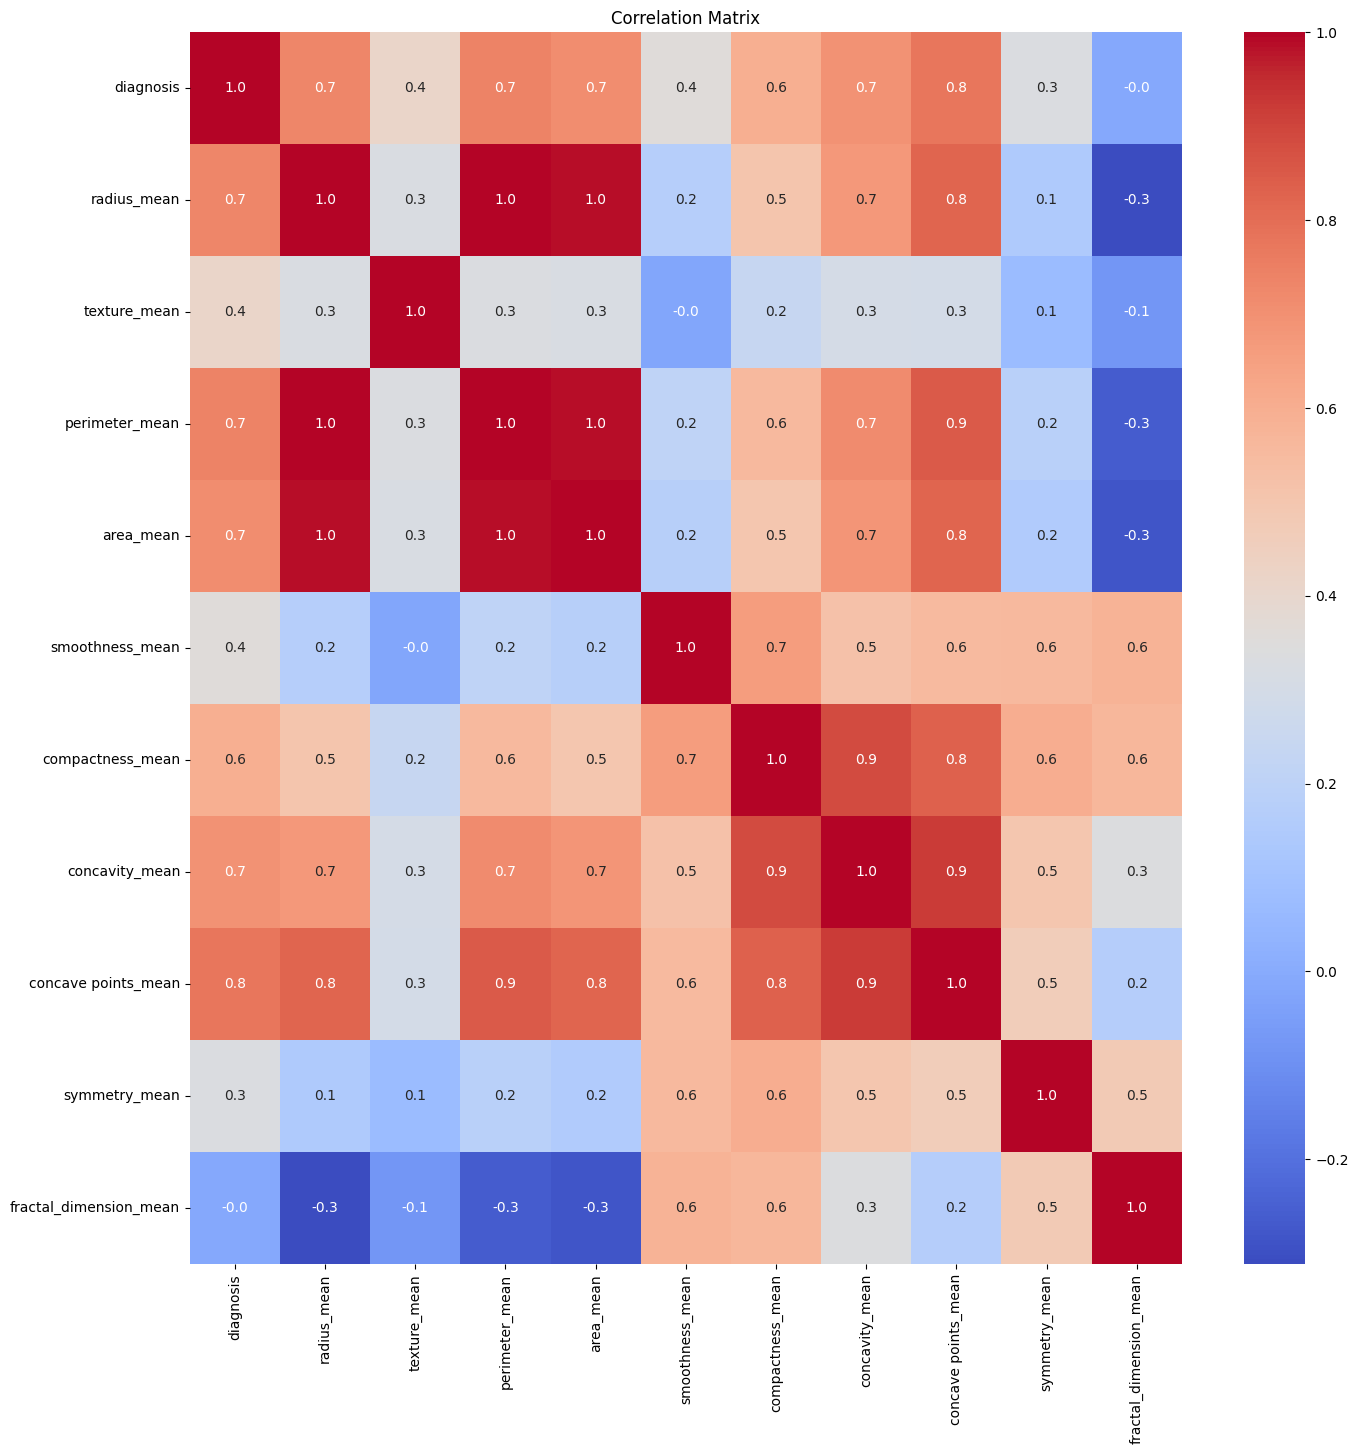

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
feature_importance = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:]
feature_importance # keep this table for poster

concave points_mean       0.776614
perimeter_mean            0.742636
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
compactness_mean          0.596534
texture_mean              0.415185
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_mean    0.012838
Name: diagnosis, dtype: float64

In [ ]:
feature_importance = feature_importance.reset_index()

In [ ]:
type(feature_importance)

pandas.core.frame.DataFrame

In [ ]:
feature_importance.rename(columns={'index':'feature', 'diagnosis':'correlation with diagnosis'}, inplace=True)
feature_importance

feature  correlation with diagnosis
0     concave points_mean                    0.776614
1          perimeter_mean                    0.742636
2             radius_mean                    0.730029
3               area_mean                    0.708984
4          concavity_mean                    0.696360
5        compactness_mean                    0.596534
6            texture_mean                    0.415185
7         smoothness_mean                    0.358560
8           symmetry_mean                    0.330499
9  fractal_dimension_mean                    0.012838

In [ ]:
feature_corr_dict = {k:v for k,v in zip(feature_importance['feature'], feature_importance['correlation with diagnosis'])}
feature_corr_dict

{'concave points_mean': 0.7766138400204371,
 'perimeter_mean': 0.7426355297258334,
 'radius_mean': 0.7300285113754563,
 'area_mean': 0.7089838365853902,
 'concavity_mean': 0.6963597071719052,
 'compactness_mean': 0.5965336775082527,
 'texture_mean': 0.41518529984520475,
 'smoothness_mean': 0.35855996508593324,
 'symmetry_mean': 0.33049855426254676,
 'fractal_dimension_mean': 0.012837602698431882}

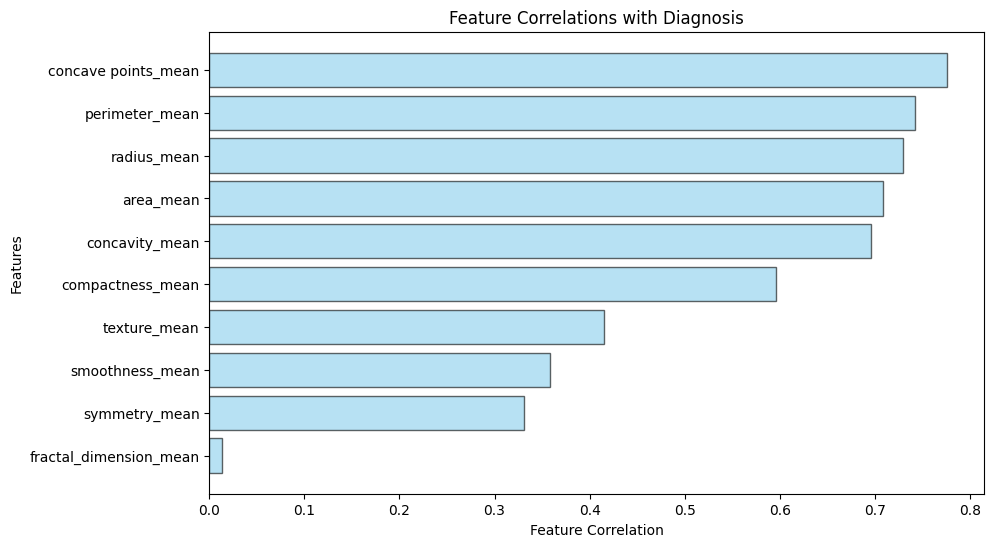

In [ ]:
features = list(feature_corr_dict.keys())
importances = list(feature_corr_dict.values())

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue', edgecolor='black', alpha=0.6)
plt.xlabel('Feature Correlation')
plt.ylabel('Features')
plt.title('Feature Correlations with Diagnosis')
plt.gca().invert_yaxis()
plt.savefig("feature_corr_with_diagnosis.png", format='png', dpi=300)
plt.show()

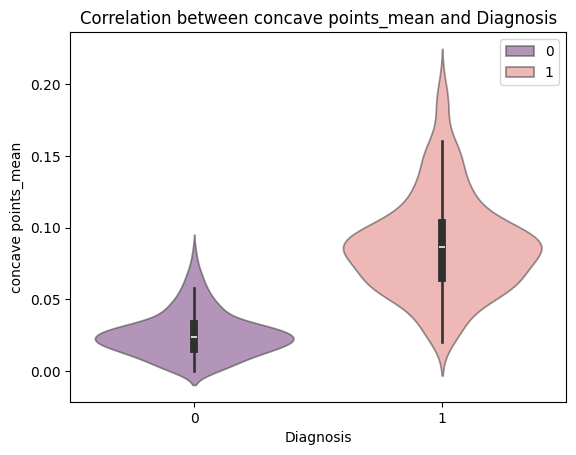

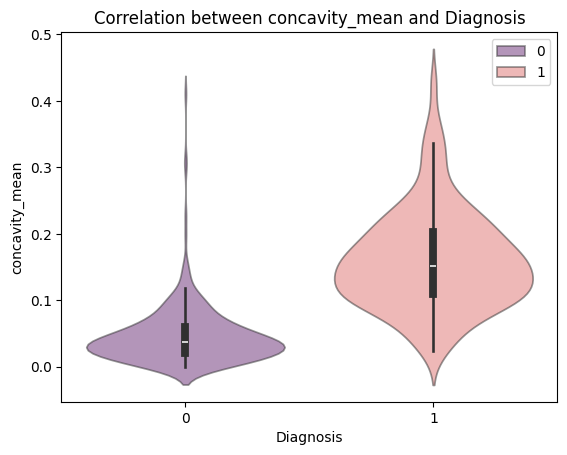

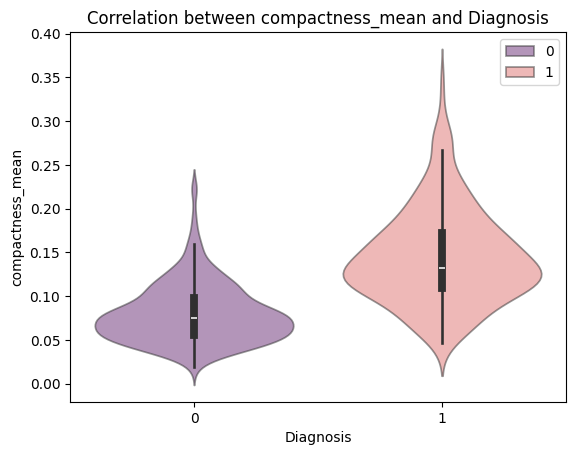

In [ ]:
for i in ["concave points_mean", "concavity_mean", "compactness_mean"]:
    sns.violinplot(x=df["diagnosis"], y=df[i], hue=df["diagnosis"], palette='magma', alpha=0.5)
    plt.xlabel("Diagnosis")
    plt.ylabel(f"{i}")
    plt.title(f"Correlation between {i} and Diagnosis")
    plt.legend()
    plt.savefig(f"{i}_vs_diagnosis_corr.png", format='png', dpi=300)
    plt.show()
    print()